## Project: Food Deserts Influence Larceny Rates

We are predicting whether or not a community is at risk for higher rates of larceny based on the amount of food deserts per population.

In [1]:
# import starter packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crimedata2.csv') # read csv into pandas

In [3]:
df # glance at dataframe

Êcommunityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR          ?             ?     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
...                       ...   ...        ...           ...   ...   
2210               Mercedcity    CA          ?             ?    10   
2211            Pinevillecity    LA          ?             ?    10   
2212              Yucaipacity    CA          ?             ?    10   
2213             Beevillecity    TX          ?             ?    10   
2214       WestSacramentocity    CA          ?             ?    10   

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          11980           3.10          1.37         91.78          6.50   
1          23123           2.82          0.80         95.57          3.44   
2          29344           2.43          0.74         94.33          3.43   
3          16656           2.40          1.70         97.35          0.50   
4          11245           2.76          0.53         89.16          1.17   
...          ...            ...           ...           ...           ...   
2210       56216           3.07          6.87         61.68         15.23   
2211       12251           2.68         21.18         76.65          1.52   
2212       32824           2.46          0.52         92.62          0.98   
2213       13547           2.89          3.37         69.91          0.90   
2214       28898           2.61          2.39         71.27          9.09   

      ...  burglaries  burglPerPop  larcenies  larcPerPop  autoTheft  \
0     ...          14       114.85        138     1132.08         16   
1     ...          57       242.37        376     1598.78         26   
2     ...         274       758.14       1797     4972.19        136   
3     ...         225      1301.78        716     4142.56         47   
4     ...          91       728.93       1060     8490.87         91   
...   ...         ...          ...        ...         ...        ...   
2210  ...        1376      2268.72       2563     4225.82        489   
2211  ...         104       860.43        574      4748.9         24   
2212  ...         628      1709.26        895     2435.97        179   
2213  ...         192      1508.01        474      3722.9         13   
2214  ...         791      2614.53       1458      4819.2        405   

      autoTheftPerPop  arsons  arsonsPerPop  ViolentCrimesPerPop  \
0              131.26       2         16.41                41.02   
1              110.55       1          4.25               127.56   
2               376.3      22         60.87               218.59   
3              271.93       ?             ?               306.64   
4              728.93       5         40.05                    ?   
...               ...     ...           ...                  ...   
2210           806.25      34         56.06               545.75   
2211           198.56       2         16.55                124.1   
2212           487.19       8         21.77               353.83   
2213            102.1       1          7.85               691.17   
2214          1338.67      20         66.11               918.89   

      nonViolPerPop  
0           1394.59  
1           1955.95  
2           6167.51  
3                 ?  
4           9988.79  
...             ...  
2210        7356.84  
2211        5824.44  
2212         4654.2  
2213        5340.87  
2214         8838.5  

[2215 rows x 147 columns]

In [4]:
df.shape # number of (rows, columns)

(2215, 147)

In [5]:
df.describe() # count, max, min, std, mean

fold    population  householdsize  racepctblack  racePctWhite  \
count  2215.000000  2.215000e+03    2215.000000   2215.000000   2215.000000   
mean      5.494357  5.311798e+04       2.707327      9.335102     83.979819   
std       2.872924  2.046203e+05       0.334120     14.247156     16.419080   
min       1.000000  1.000500e+04       1.600000      0.000000      2.680000   
25%       3.000000  1.436600e+04       2.500000      0.860000     76.320000   
50%       5.000000  2.279200e+04       2.660000      2.870000     90.350000   
75%       8.000000  4.302400e+04       2.850000     11.145000     96.225000   
max      10.000000  7.322564e+06       5.280000     96.670000     99.630000   

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
count   2215.000000  2215.000000  2215.000000  2215.000000  2215.000000  ...   
mean       2.670203     7.950176    14.445837    27.644840    13.975142  ...   
std        4.473843    14.589832     4.518623     6.181517     5.970747  ...   
min        0.030000     0.120000     4.580000     9.380000     4.640000  ...   
25%        0.620000     0.930000    12.250000    24.415000    11.320000  ...   
50%        1.230000     2.180000    13.620000    26.780000    12.540000  ...   
75%        2.670000     7.810000    15.360000    29.205000    14.345000  ...   
max       57.460000    95.290000    54.400000    70.510000    63.620000  ...   

       PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  \
count       2215.000000     2215.000000    2215.000000     2215.000000   
mean          61.539630       51.538596      77.411079       88.111865   
std           16.750061       10.517926      10.878186        7.287836   
min            6.750000       11.830000      27.950000       32.830000   
25%           50.110000       44.995000      72.060000       85.200000   
50%           64.490000       52.170000      79.490000       90.030000   
75%           74.855000       58.740000      85.135000       93.010000   
max           93.140000       78.560000      96.590000       99.900000   

          LandArea       PopDens  PctUsePubTrans  LemasPctOfficDrugUn  \
count  2215.000000   2215.000000     2215.000000          2215.000000   
mean     27.419955   2783.835034        3.041124             0.980163   
std     109.822600   2828.993341        4.912917             2.877128   
min       0.900000     10.000000        0.000000             0.000000   
25%       7.300000   1181.900000        0.360000             0.000000   
50%      13.700000   2027.300000        1.220000             0.000000   
75%      26.100000   3321.700000        3.365000             0.000000   
max    3569.800000  44229.900000       54.330000            48.440000   

           murders   murdPerPop  
count  2215.000000  2215.000000  
mean      7.764786     5.859296  
std      58.166468     9.156829  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     2.170000  
75%       3.000000     8.365000  
max    1946.000000    91.090000  

[8 rows x 104 columns]

In [6]:
df.isna().sum() # sum of all null values in each column

Êcommunityname         0
state                  0
countyCode             0
communityCode          0
fold                   0
                      ..
autoTheftPerPop        0
arsons                 0
arsonsPerPop           0
ViolentCrimesPerPop    0
nonViolPerPop          0
Length: 147, dtype: int64

WHY is that zero for nearly every column???????

In [7]:
df.head()

Êcommunityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980   
1           Marpletownship    PA         45         47616     1       23123   
2               Tigardcity    OR          ?             ?     1       29344   
3         Gloversvillecity    NY         35         29443     1       16656   
4              Bemidjicity    MN          7          5068     1       11245   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           3.10          1.37         91.78          6.50  ...          14   
1           2.82          0.80         95.57          3.44  ...          57   
2           2.43          0.74         94.33          3.43  ...         274   
3           2.40          1.70         97.35          0.50  ...         225   
4           2.76          0.53         89.16          1.17  ...          91   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0       114.85        138     1132.08         16           131.26       2   
1       242.37        376     1598.78         26           110.55       1   
2       758.14       1797     4972.19        136            376.3      22   
3      1301.78        716     4142.56         47           271.93       ?   
4       728.93       1060     8490.87         91           728.93       5   

   arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0         16.41                41.02        1394.59  
1          4.25               127.56        1955.95  
2         60.87               218.59        6167.51  
3             ?               306.64              ?  
4         40.05                    ?        9988.79  

[5 rows x 147 columns]

Oh, it is because nearly every missing item is a '?' instead of a null value, lets fix that!

In [8]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [9]:
df.dtypes # data types of each column

Êcommunityname         object
state                  object
countyCode             object
communityCode          object
fold                    int64
                        ...  
autoTheftPerPop        object
arsons                 object
arsonsPerPop           object
ViolentCrimesPerPop    object
nonViolPerPop          object
Length: 147, dtype: object

In [10]:
# viewing all columns with their datatypes as a list of tuples
data_types = [(col, df[col].dtype) for col in df.columns]

# print the list of column names with their datatypes
for col, dtype in data_types:
    print(f"{col}: {dtype}")

Êcommunityname: object
state: object
countyCode: object
communityCode: object
fold: int64
population: int64
householdsize: float64
racepctblack: float64
racePctWhite: float64
racePctAsian: float64
racePctHisp: float64
agePct12t21: float64
agePct12t29: float64
agePct16t24: float64
agePct65up: float64
numbUrban: int64
pctUrban: float64
medIncome: int64
pctWWage: float64
pctWFarmSelf: float64
pctWInvInc: float64
pctWSocSec: float64
pctWPubAsst: float64
pctWRetire: float64
medFamInc: int64
perCapInc: int64
whitePerCap: int64
blackPerCap: int64
indianPerCap: int64
AsianPerCap: int64
OtherPerCap: object
HispPerCap: int64
NumUnderPov: int64
PctPopUnderPov: float64
PctLess9thGrade: float64
PctNotHSGrad: float64
PctBSorMore: float64
PctUnemployed: float64
PctEmploy: float64
PctEmplManu: float64
PctEmplProfServ: float64
PctOccupManu: float64
PctOccupMgmtProf: float64
MalePctDivorce: float64
MalePctNevMarr: float64
FemalePctDiv: float64
TotalPctDiv: float64
PersPerFam: float64
PctFam2Par: float64

In [11]:
# List of columns to convert to numeric
columns_to_convert = [
    'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 
    'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 
    'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop', 'nonViolPerPop', 'OtherPerCap'
]

In [12]:
# Convert these columns to numeric, forcing invalid values to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric)

# make sure the conversion worked
print(df[columns_to_convert].dtypes)

rapes                  float64
rapesPerPop            float64
robberies              float64
robbbPerPop            float64
assaults               float64
assaultPerPop          float64
burglaries             float64
burglPerPop            float64
larcenies              float64
larcPerPop             float64
autoTheft              float64
autoTheftPerPop        float64
arsons                 float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
OtherPerCap            float64
dtype: object


In [13]:
# now we can get the sum of all null values in each column
# viewing all columns with their datatypes as a list of tuples
data_na_totals = [(col, df[col].isna().sum()) for col in df.columns]

# print the list of column names with their datatypes
for col, na in data_na_totals:
    print(f"{col}: {na}")

Êcommunityname: 0
state: 0
countyCode: 1221
communityCode: 1224
fold: 0
population: 0
householdsize: 0
racepctblack: 0
racePctWhite: 0
racePctAsian: 0
racePctHisp: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
whitePerCap: 0
blackPerCap: 0
indianPerCap: 0
AsianPerCap: 0
OtherPerCap: 1
HispPerCap: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
MalePctNevMarr: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumKidsBornNeverMar: 0
PctKidsBornNeverMar: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8

In [14]:
percent_null = 40.0
min_count =  int(((100-percent_null)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)

In [15]:
# now we can get the sum of all null values in each column
# viewing all columns with their datatypes as a list of tuples
data_na_totals = [(col, df[col].isna().sum()) for col in df.columns]

# print the list of column names with their datatypes
for col, na in data_na_totals:
    print(f"{col}: {na}")

Êcommunityname: 0
state: 0
fold: 0
population: 0
householdsize: 0
racepctblack: 0
racePctWhite: 0
racePctAsian: 0
racePctHisp: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
whitePerCap: 0
blackPerCap: 0
indianPerCap: 0
AsianPerCap: 0
OtherPerCap: 1
HispPerCap: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
MalePctNevMarr: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumKidsBornNeverMar: 0
PctKidsBornNeverMar: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
PctRecImmig10: 0
PctSpeakEnglOnly

In [16]:
mean_values = df.mean(numeric_only=True)

df_filled = df.fillna(mean_values)

df = df_filled

In [17]:
# now we can get the sum of all null values in each column
# viewing all columns with their datatypes as a list of tuples
data_na_totals = [(col, df[col].isna().sum()) for col in df.columns]

# print the list of column names with their datatypes
for col, na in data_na_totals:
    print(f"{col}: {na}")

Êcommunityname: 0
state: 0
fold: 0
population: 0
householdsize: 0
racepctblack: 0
racePctWhite: 0
racePctAsian: 0
racePctHisp: 0
agePct12t21: 0
agePct12t29: 0
agePct16t24: 0
agePct65up: 0
numbUrban: 0
pctUrban: 0
medIncome: 0
pctWWage: 0
pctWFarmSelf: 0
pctWInvInc: 0
pctWSocSec: 0
pctWPubAsst: 0
pctWRetire: 0
medFamInc: 0
perCapInc: 0
whitePerCap: 0
blackPerCap: 0
indianPerCap: 0
AsianPerCap: 0
OtherPerCap: 0
HispPerCap: 0
NumUnderPov: 0
PctPopUnderPov: 0
PctLess9thGrade: 0
PctNotHSGrad: 0
PctBSorMore: 0
PctUnemployed: 0
PctEmploy: 0
PctEmplManu: 0
PctEmplProfServ: 0
PctOccupManu: 0
PctOccupMgmtProf: 0
MalePctDivorce: 0
MalePctNevMarr: 0
FemalePctDiv: 0
TotalPctDiv: 0
PersPerFam: 0
PctFam2Par: 0
PctKids2Par: 0
PctYoungKids2Par: 0
PctTeen2Par: 0
PctWorkMomYoungKids: 0
PctWorkMom: 0
NumKidsBornNeverMar: 0
PctKidsBornNeverMar: 0
NumImmig: 0
PctImmigRecent: 0
PctImmigRec5: 0
PctImmigRec8: 0
PctImmigRec10: 0
PctRecentImmig: 0
PctRecImmig5: 0
PctRecImmig8: 0
PctRecImmig10: 0
PctSpeakEnglOnly

In [18]:
for col in df.columns:
    print(f"{col}:\n {df[col].value_counts()}\n")  # prints bins in each column and number of items in each bin

Êcommunityname:
 Auburncity            5
Greenvillecity        5
Jacksonvillecity      5
Springfieldcity       5
Albanycity            4
                     ..
Lackawannacity        1
LincolnParkborough    1
Keizercity            1
TarponSpringscity     1
WestSacramentocity    1
Name: Êcommunityname, Length: 2018, dtype: int64

state:
 CA    279
NJ    211
TX    162
MA    123
OH    111
MI    108
PA    101
FL     90
CT     71
MN     66
WI     60
IN     48
NC     46
NY     46
AL     43
MO     42
WA     40
IL     40
GA     37
OK     36
TN     35
VA     33
OR     31
SC     28
RI     26
KY     26
CO     25
AR     25
UT     24
LA     22
NH     21
IA     20
MS     20
AZ     20
ME     17
WV     14
MD     12
NM     10
SD      9
ND      8
WY      7
ID      7
NV      5
VT      4
AK      3
KS      1
DE      1
DC      1
Name: state, dtype: int64

fold:
 1     222
2     222
3     222
4     222
5     222
6     221
7     221
8     221
9     221
10    221
Name: fold, dtype: int64

population:
 12361   

PctRecentImmig:
 0.00    131
0.04     35
0.06     35
0.12     32
0.17     32
       ... 
3.32      1
4.48      1
1.98      1
4.69      1
5.09      1
Name: PctRecentImmig, Length: 448, dtype: int64

PctRecImmig5:
 0.00    63
0.07    31
0.19    28
0.10    26
0.18    24
        ..
7.26     1
1.70     1
5.72     1
5.83     1
6.51     1
Name: PctRecImmig5, Length: 568, dtype: int64

PctRecImmig8:
 0.00    37
0.34    26
0.12    22
0.28    22
0.39    22
        ..
9.04     1
2.84     1
5.66     1
1.99     1
7.64     1
Name: PctRecImmig8, Length: 670, dtype: int64

PctRecImmig10:
 0.00     20
0.46     18
0.40     17
0.76     16
0.68     16
         ..
6.32      1
4.02      1
28.59     1
14.60     1
9.23      1
Name: PctRecImmig10, Length: 738, dtype: int64

PctSpeakEnglOnly:
 95.17    7
93.57    7
95.97    7
96.12    7
94.63    7
        ..
79.27    1
95.68    1
81.95    1
91.70    1
74.98    1
Name: PctSpeakEnglOnly, Length: 1416, dtype: int64

PctNotSpeakEnglWell:
 0.44     26
0.48     23
0.

In [19]:
df.columns.tolist() # list of total columns for reference since .columns only shows so many

['Êcommunityname',
 'state',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumKidsBornNeverMar',
 'PctKidsBornNeverMar',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'Pct

## Correlations (Positive and Negative)

In [20]:
# Create a heatmap starting at the 5th index
df_subset = df.iloc[5:]

# Correlation
plt.figure(figsize=(100,100))
sns.heatmap(df_subset.corr(numeric_only=True),annot=True)
plt.title('Correlation of Attributes')
plt.show()

In [21]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix['larcPerPop'].sort_values(ascending=False)
print(correlation_with_target.head(25)) # top 25 variables correlated to larcPerPop

larcPerPop             1.000000
nonViolPerPop          0.927626
burglPerPop            0.604459
TotalPctDiv            0.525188
MalePctDivorce         0.514170
FemalePctDiv           0.511368
rapesPerPop            0.495589
ViolentCrimesPerPop    0.492816
PctPopUnderPov         0.452417
PctHousNoPhone         0.450435
assaultPerPop          0.445214
robbbPerPop            0.422375
PctKidsBornNeverMar    0.409319
PctHousLess3BR         0.389260
racepctblack           0.362738
autoTheftPerPop        0.362575
pctWPubAsst            0.353609
murdPerPop             0.345486
arsonsPerPop           0.303201
PctUnemployed          0.293820
PctNotHSGrad           0.287266
PctImmigRec10          0.234904
PctVacantBoarded       0.226246
PctLess9thGrade        0.221941
LemasPctOfficDrugUn    0.215202
Name: larcPerPop, dtype: float64


In [22]:
print(correlation_with_target.tail(25)) # top negatively correlated variables to larcPerPop

PctHousOccup        -0.263105
PersPerOccupHous    -0.264056
PctEmploy           -0.277274
RentQrange          -0.279891
pctWWage            -0.306484
OwnOccHiQuart       -0.307836
perCapInc           -0.309160
OwnOccMedVal        -0.320958
racePctWhite        -0.321352
PersPerOwnOccHous   -0.321699
MedNumBR            -0.324523
OwnOccLowQuart      -0.334841
RentLowQ            -0.356627
RentMedian          -0.375966
RentHighQ           -0.377599
MedRent             -0.382933
pctWInvInc          -0.386698
PctHousOwnOcc       -0.393558
PctPersOwnOccup     -0.420521
medFamInc           -0.435318
medIncome           -0.454502
PctTeen2Par         -0.509333
PctYoungKids2Par    -0.516231
PctKids2Par         -0.544812
PctFam2Par          -0.549538
Name: larcPerPop, dtype: float64


# Sklearn Feature Importance

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# define target and features
X = df.drop(columns=['larcPerPop', 'Êcommunityname', 'state']) # drop target column and columns with strings
y = df['larcPerPop'] # target column

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
importances = rf.feature_importances_.argsort()

feature_names = X.columns

In [27]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

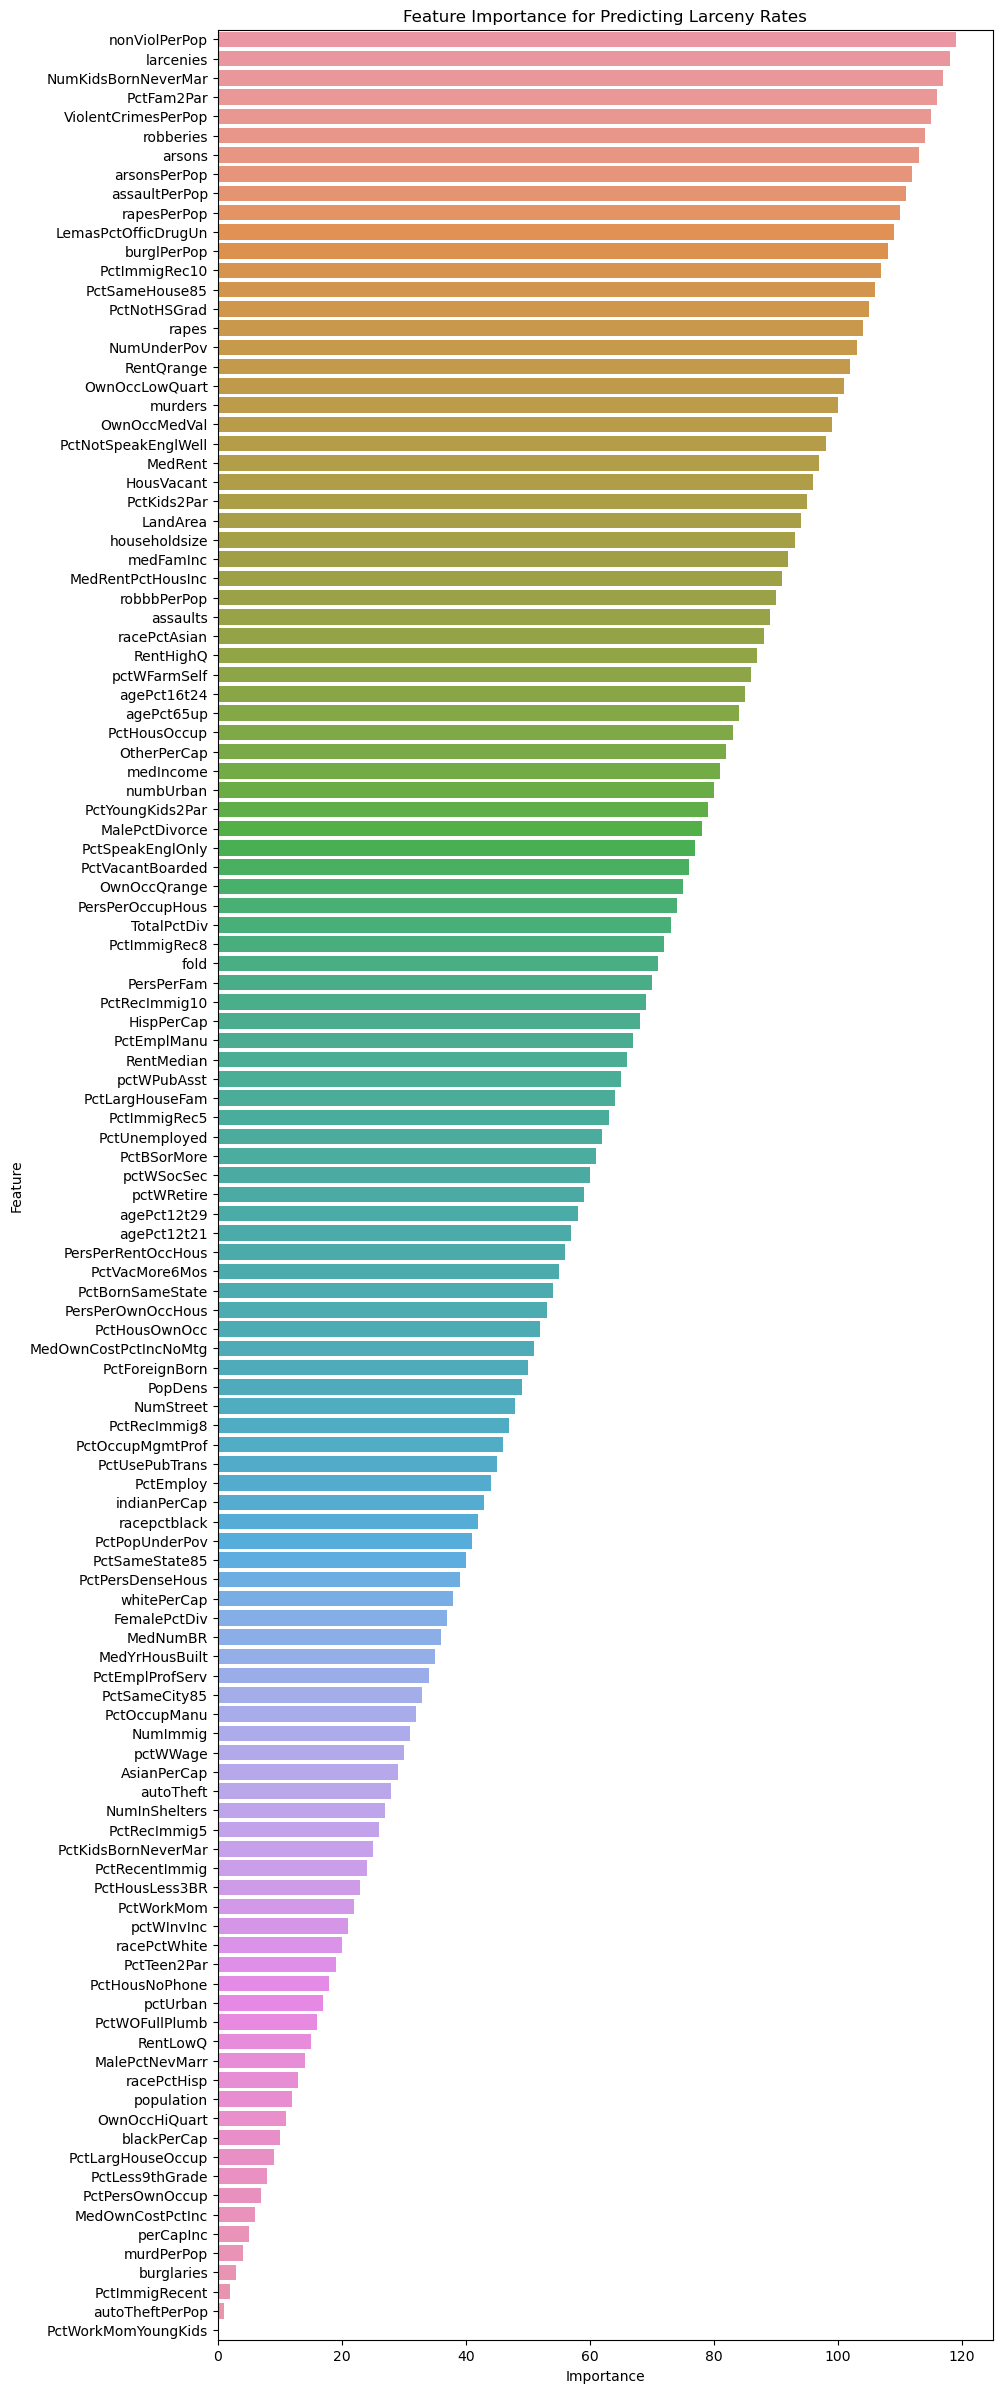

In [28]:
# Plot feature importance
plt.figure(figsize=(10,30))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Larceny Rates')
plt.show()

# Outliers

In [37]:
df.head(10)

Êcommunityname state  fold  population  householdsize  \
0  BerkeleyHeightstownship    NJ     1       11980           3.10   
1           Marpletownship    PA     1       23123           2.82   
2               Tigardcity    OR     1       29344           2.43   
3         Gloversvillecity    NY     1       16656           2.40   
4              Bemidjicity    MN     1       11245           2.76   
5          Springfieldcity    MO     1      140494           2.45   
6              Norwoodtown    MA     1       28700           2.60   
7             Andersoncity    IN     1       59459           2.45   
8                Fargocity    ND     1       74111           2.46   
9                 Wacocity    TX     1      103590           2.62   

   racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  ...  \
0          1.37         91.78          6.50         1.88        12.47  ...   
1          0.80         95.57          3.44         0.85        11.01  ...   
2          0.74         94.33          3.43         2.35        11.36  ...   
3          1.70         97.35          0.50         0.70        12.55  ...   
4          0.53         89.16          1.17         0.52        24.46  ...   
5          2.51         95.65          0.90         0.95        18.09  ...   
6          1.60         96.57          1.47         1.10        11.17  ...   
7         14.20         84.87          0.40         0.63        15.31  ...   
8          0.35         97.11          1.25         0.73        16.64  ...   
9         23.14         67.60          0.92        16.35        19.88  ...   

   burglaries  burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  \
0        14.0       114.85      138.0     1132.08       16.0           131.26   
1        57.0       242.37      376.0     1598.78       26.0           110.55   
2       274.0       758.14     1797.0     4972.19      136.0           376.30   
3       225.0      1301.78      716.0     4142.56       47.0           271.93   
4        91.0       728.93     1060.0     8490.87       91.0           728.93   
5      2094.0      1386.46     7690.0     5091.64      454.0           300.60   
6       110.0       372.09      288.0      974.19      144.0           487.10   
7       608.0       997.60     2250.0     3691.79      125.0           205.10   
8       425.0       532.66     3149.0     3946.71      206.0           258.18   
9      2397.0      2221.81     6121.0     5673.63     1070.0           991.80   

       arsons  arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0    2.000000     16.410000            41.020000    1394.590000  
1    1.000000      4.250000           127.560000    1955.950000  
2   22.000000     60.870000           218.590000    6167.510000  
3   30.907721     32.153682           306.640000    4908.241804  
4    5.000000     40.050000           589.078922    9988.790000  
5  134.000000     88.720000           442.950000    6867.420000  
6   17.000000     57.500000           226.630000    1890.880000  
7    9.000000     14.770000           439.730000    4909.260000  
8    8.000000     10.030000           115.310000    4747.580000  
9   18.000000     16.680000          1544.240000    8903.930000  

[10 rows x 123 columns]

In [38]:
df[['larcPerPop']].isnull().sum()

larcPerPop    0
dtype: int64

In [46]:
from sklearn.ensemble import IsolationForest

dfo = df[['larcPerPop']]

# Fit the model
iso_forest = IsolationForest(contamination=0.05)  # Assume 5% of data are outliers
dfo['outliers'] = iso_forest.fit_predict(dfo[['larcPerPop']])

# Filter the outliers (-1 is an outlier, 1 is normal)
outliers = dfo[dfo['outliers'] == -1]
print(outliers)

      larcPerPop  outliers
4        8490.87        -1
33        568.56        -1
109     19401.00        -1
113      7882.35        -1
136      7789.18        -1
...          ...       ...
2112     8197.35        -1
2156     7373.97        -1
2163      241.10        -1
2190      653.39        -1
2196     7982.35        -1

[111 rows x 2 columns]


C:\Users\kreda\AppData\Local\Temp\ipykernel_22132\1315328824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfo['outliers'] = iso_forest.fit_predict(dfo[['larcPerPop']])


In [48]:
num_outliers = (dfo['outliers'] == -1).sum()

print(f"Number of outliers: {num_outliers}")

Number of outliers: 111


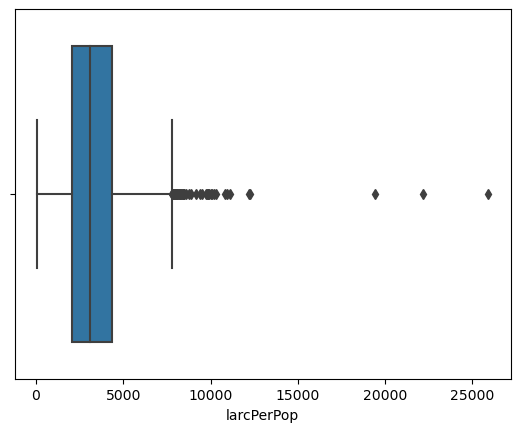

In [49]:
# Create a boxplot for a specific column
sns.boxplot(x=df['larcPerPop'])
plt.show()

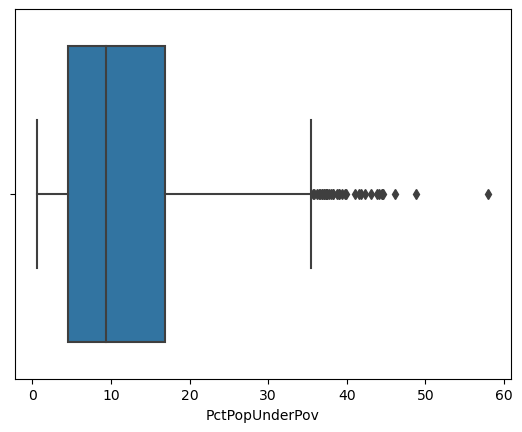

In [50]:
# Create a boxplot for a specific column
sns.boxplot(x=df['PctPopUnderPov'])
plt.show()

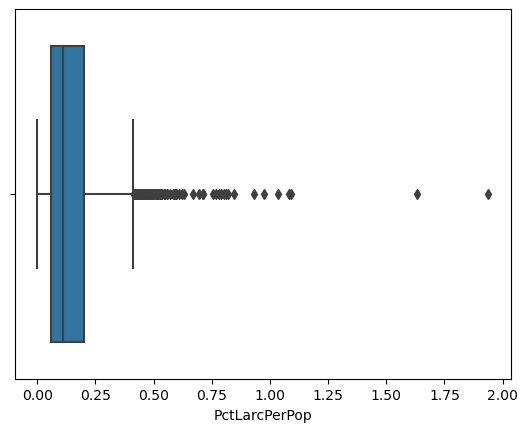

In [57]:
sns.boxplot(x=df['PctLarcPerPop'])
plt.show() 

#Code to create a boxplot for the new variable created

# New Column: PctLarcPerPop

In [51]:
df['PctLarcPerPop']=df['larcPerPop']/df['population'] #Creates a new column that divides larcPerPop by Population

In [52]:
df.head(5)

Êcommunityname state  fold  population  householdsize  \
0  BerkeleyHeightstownship    NJ     1       11980           3.10   
1           Marpletownship    PA     1       23123           2.82   
2               Tigardcity    OR     1       29344           2.43   
3         Gloversvillecity    NY     1       16656           2.40   
4              Bemidjicity    MN     1       11245           2.76   

   racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  ...  \
0          1.37         91.78          6.50         1.88        12.47  ...   
1          0.80         95.57          3.44         0.85        11.01  ...   
2          0.74         94.33          3.43         2.35        11.36  ...   
3          1.70         97.35          0.50         0.70        12.55  ...   
4          0.53         89.16          1.17         0.52        24.46  ...   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop     arsons  \
0       114.85      138.0     1132.08       16.0           131.26   2.000000   
1       242.37      376.0     1598.78       26.0           110.55   1.000000   
2       758.14     1797.0     4972.19      136.0           376.30  22.000000   
3      1301.78      716.0     4142.56       47.0           271.93  30.907721   
4       728.93     1060.0     8490.87       91.0           728.93   5.000000   

   arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  PctLarcPerPop  
0     16.410000            41.020000    1394.590000       0.094497  
1      4.250000           127.560000    1955.950000       0.069142  
2     60.870000           218.590000    6167.510000       0.169445  
3     32.153682           306.640000    4908.241804       0.248713  
4     40.050000           589.078922    9988.790000       0.755080  

[5 rows x 124 columns]

# One-hot Encoding

In [56]:
one_hot_df = pd.get_dummies(df,columns=['PctLarcPerPop','larcPerPop','NumUnderPov'],drop_first=True)
one_hot_df.head()

Êcommunityname state  fold  population  householdsize  \
0  BerkeleyHeightstownship    NJ     1       11980           3.10   
1           Marpletownship    PA     1       23123           2.82   
2               Tigardcity    OR     1       29344           2.43   
3         Gloversvillecity    NY     1       16656           2.40   
4              Bemidjicity    MN     1       11245           2.76   

   racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  ...  \
0          1.37         91.78          6.50         1.88        12.47  ...   
1          0.80         95.57          3.44         0.85        11.01  ...   
2          0.74         94.33          3.43         2.35        11.36  ...   
3          1.70         97.35          0.50         0.70        12.55  ...   
4          0.53         89.16          1.17         0.52        24.46  ...   

   NumUnderPov_152042  NumUnderPov_156284  NumUnderPov_177790  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   NumUnderPov_207161  NumUnderPov_313374  NumUnderPov_328467  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   NumUnderPov_332974  NumUnderPov_592298  NumUnderPov_643809  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   NumUnderPov_1384994  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 6449 columns]

# VIF Multicollinearity

## Define a threshold for correlation

Typically greater than 0.4 are relatively strong

In [33]:
# threshold for strong correlation
threshold = 0.4

# select features with abs correlation greater than the threshold
threshold_features = correlation_with_target[(correlation_with_target) > threshold].index.tolist()

# show selected features
print("Selected features with more than 0.4 corr: ", threshold_features)

Selected features with more than 0.4 corr:  ['larcPerPop', 'nonViolPerPop', 'burglPerPop', 'TotalPctDiv', 'MalePctDivorce', 'FemalePctDiv', 'rapesPerPop', 'ViolentCrimesPerPop', 'PctPopUnderPov', 'PctHousNoPhone', 'assaultPerPop', 'robbbPerPop', 'PctKidsBornNeverMar']


OK now lets use VIF to detect multicollinearity. The higher the VIF, the more we may need to remove those variables

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# using the threshold features in the VIF since they have a correlation, either positive or negative
X = df[threshold_features] # assign to X for easier reference

# drop NaN values (VIF can't handle missing values)
X = X.dropna()

# calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# print VIF results
print(vif_data)

                Feature           VIF
0            larcPerPop     58.032143
1         nonViolPerPop    106.638879
2           burglPerPop     13.649675
3           TotalPctDiv  15794.267578
4        MalePctDivorce   2809.537870
5          FemalePctDiv   5461.302582
6           rapesPerPop      4.152434
7   ViolentCrimesPerPop     15.191113
8        PctPopUnderPov      9.725036
9        PctHousNoPhone      6.941890
10        assaultPerPop      7.775008
11          robbbPerPop      7.717351
12  PctKidsBornNeverMar      7.741096


In [35]:
# define a threshold for VIF, usually we remove features with VIF > 5 or VIF > 10
vif_threshold = 5000 # made this number so big just so I could see all of the features and their VIF, since removing some will make the others go down
features_to_keep = vif_data[vif_data['VIF'] < vif_threshold]['Feature'].tolist()

# Keep only features with acceptable VIF values, kinda, our limit is high
X_filtered = X[features_to_keep]

# calculate VIF for each feature
vif_data2 = pd.DataFrame()
vif_data2['Feature'] = X_filtered.columns
vif_data2['VIF'] = [variance_inflation_factor(X_filtered.values, i) for i in range(len(X_filtered.columns))]

# print VIF results
print(vif_data2)

                Feature         VIF
0            larcPerPop   57.118889
1         nonViolPerPop  104.877406
2           burglPerPop   13.626879
3        MalePctDivorce    7.833812
4           rapesPerPop    4.093489
5   ViolentCrimesPerPop   14.953960
6        PctPopUnderPov    9.209176
7        PctHousNoPhone    6.644991
8         assaultPerPop    7.678349
9           robbbPerPop    7.612462
10  PctKidsBornNeverMar    7.681738


In [36]:
# define a threshold for VIF, usually we remove features with VIF > 5 or VIF > 10
vif_threshold_reduced = 300 # made this number so big just so I could see all of the features and their VIF, since removing some will make the others go down
features_to_keep_reduced = vif_data2[vif_data2['VIF'] < vif_threshold_reduced]['Feature'].tolist()

# Keep only features with acceptable VIF values, kinda, our limit is high
X_filtered_reduced = X[features_to_keep_reduced]


# recalculate VIF on the reduced dataset
vif_data_reduced = pd.DataFrame()
vif_data_reduced['Feature'] = X_filtered_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_filtered_reduced.values, i) for i in range(len(X_filtered_reduced.columns))]

# show new VIF results
print(vif_data_reduced)

                Feature         VIF
0            larcPerPop   57.118889
1         nonViolPerPop  104.877406
2           burglPerPop   13.626879
3        MalePctDivorce    7.833812
4           rapesPerPop    4.093489
5   ViolentCrimesPerPop   14.953960
6        PctPopUnderPov    9.209176
7        PctHousNoPhone    6.644991
8         assaultPerPop    7.678349
9           robbbPerPop    7.612462
10  PctKidsBornNeverMar    7.681738
